In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt

In [49]:
df=pd.read_csv("heart.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [50]:
df.drop(['education'],axis=1,inplace=True)


In [5]:
df.shape

(4238, 15)

In [6]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [51]:
df.dropna(axis=0,inplace=True)

In [52]:
df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

/home/mona/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

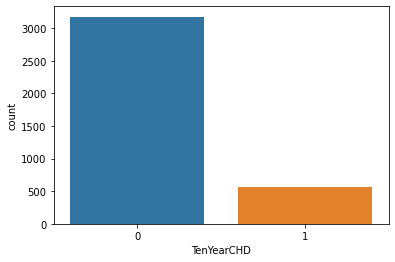

In [17]:
sns.countplot(df['TenYearCHD'],label="Count")

There are 3177 patients with no heart disease and 572 patients with risk of heart disease.

<AxesSubplot:>

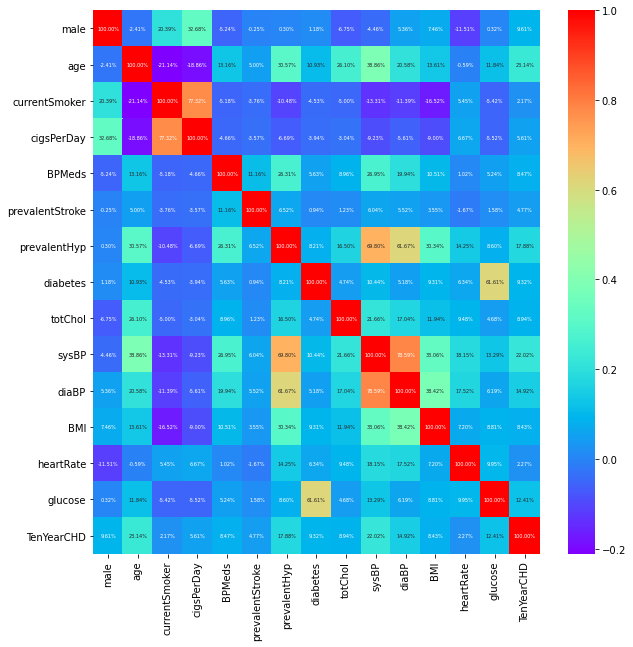

In [15]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr,annot = True,fmt='.2%',cmap='rainbow', annot_kws = {'size' : 5})

In [16]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']] = scaler.fit_transform(df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']])

In [54]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,0,0.000000,0.0,0,0,0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0,0.368421,0,0.000000,0.0,0,0,0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1,0.421053,1,0.285714,0.0,0,0,0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0,0.763158,1,0.428571,0.0,0,1,0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0,0.368421,1,0.328571,0.0,0,0,0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119,0


In [55]:
from sklearn.model_selection import train_test_split
X_data=df.drop('TenYearCHD',axis = 1)
Y_data = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, stratify=df['TenYearCHD'], test_size=0.30, random_state=66)


In [56]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred=logreg.predict(X_test)

In [63]:
accuracy_score(y_test,y_pred)


0.8533333333333334

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       953
           1       0.89      0.05      0.09       172

    accuracy                           0.85      1125
   macro avg       0.87      0.52      0.50      1125
weighted avg       0.86      0.85      0.79      1125



In [65]:
print(confusion_matrix(y_test,y_pred))

[[952   1]
 [164   8]]


<AxesSubplot:>

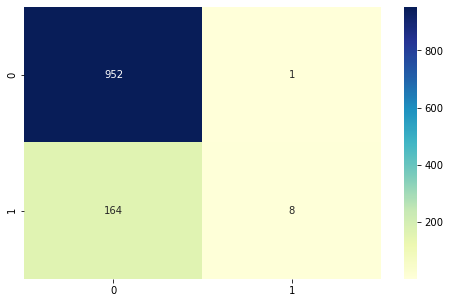

In [67]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt='d',cmap="YlGnBu")